In [1]:
from pathlib import Path
from typing import Generator, List, Tuple
from editor.utils import compute_histogram
from editor.ploting import display_images, plot_histograms
from PIL import Image

DATA = Path('/mnt/wsl/PHYSICALDRIVE1/data/unsplash/edited')
BINS = 32

edited = sorted(DATA.glob('*'))

def get_data() -> Generator[Tuple[Path, List[Path]], None, None]:
    for path in edited:
        if len(list(path.glob('*.jpg'))) != 6:
            continue
        yield path / 'original.jpg', [path / f'{i}.jpg' for i in range(5)]

all_images = iter(get_data())

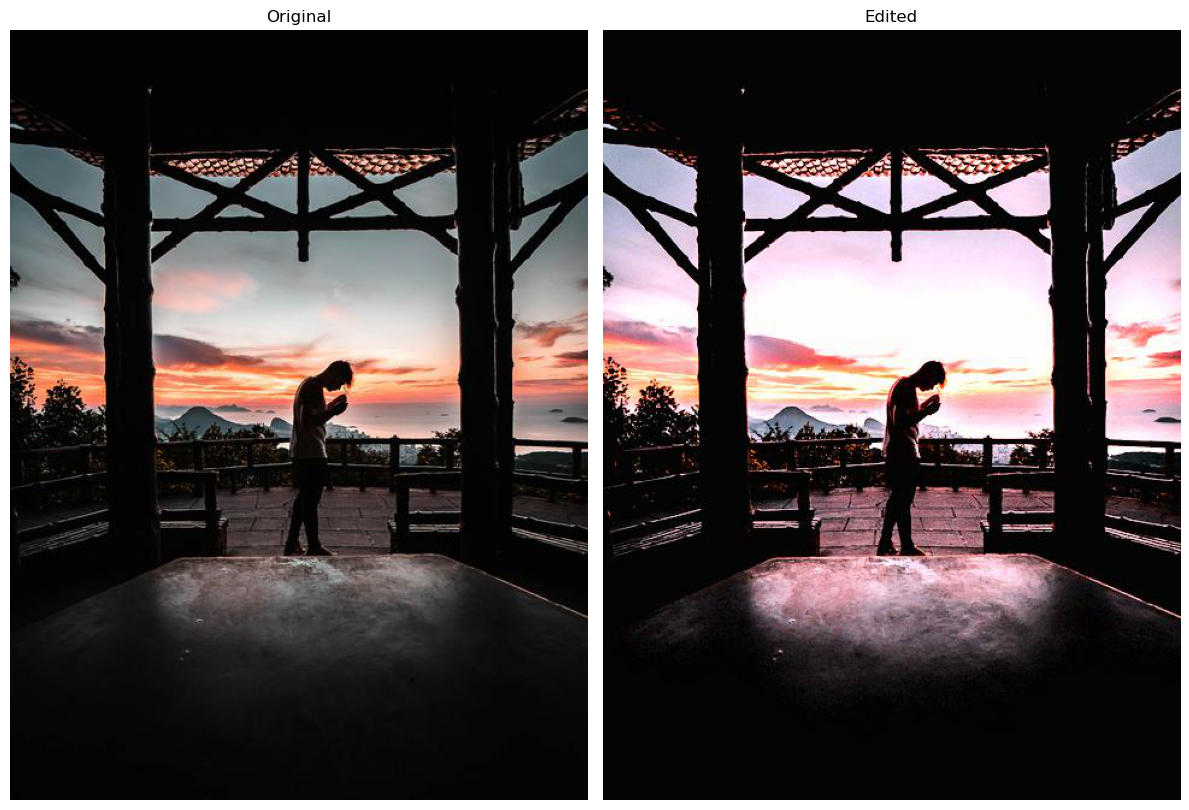

In [2]:
og, (edit, *_) = next(all_images)

display_images([Image.open(og), Image.open(edit)], ["Original", "Edited"])
plot_histograms([compute_histogram(og, BINS), compute_histogram(edit, BINS)])